<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/mingpbs_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>2019 Data Science Bowl EDA</h1>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Prepare the data analysis</a>  
    -<a href='#21'>Load the packages</a>  
    -<a href='#22'>Load the data</a>  
- <a href='#3'>Data exploration</a>  
    -<a href='#30'>Glimpse the data</a>  
    -<a href='#31'>Missing data</a>  
    -<a href='#32'>Unique values</a>  
    -<a href='#33'>Most frequent values</a>      
    -<a href='#34'>Values distribution</a>   
    -<a href='#35'>Extract features from train/event_data</a>  
    -<a href='#36'>Extract features from specs/args</a>      
    -<a href='#37'>Merged data distribution</a>  
- <a href='#4'>Next step</a>  
    

# <a id="1">Introduction</a>  

This Kernel objective is to explore the dataset for 2019 Data Science Bowl EDA.   

# <a id="2">Prepare the data analyisis</a>  

We load the packages needed for data processing and visualization and we read the data.  

## <a id="21">Load the packages</a>  

In [0]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

## <a id="22">Load the data</a>  

We define a function to read all the data and report the shape of datasets.  


In [0]:
def read_data():
    print(f'Read data')
    train_df = pd.read_csv('../input/data-science-bowl-2019/train.csv')
    test_df = pd.read_csv('../input/data-science-bowl-2019/test.csv')
    train_labels_df = pd.read_csv('../input/data-science-bowl-2019/train_labels.csv')
    specs_df = pd.read_csv('../input/data-science-bowl-2019/specs.csv')
    sample_submission_df = pd.read_csv('../input/data-science-bowl-2019/sample_submission.csv')
    print(f"train shape: {train_df.shape}")
    print(f"test shape: {test_df.shape}")
    print(f"train labels shape: {train_labels_df.shape}")
    print(f"specs shape: {specs_df.shape}")
    print(f"sample submission shape: {sample_submission_df.shape}")
    return train_df, test_df, train_labels_df, specs_df, sample_submission_df

In [0]:
train_df, test_df, train_labels_df, specs_df, sample_submission_df = read_data()

Read data
train shape: (11341042, 11)
test shape: (1156414, 11)
train labels shape: (17690, 7)
specs shape: (386, 3)
sample submission shape: (1000, 2)


# <a id="3">Data exploration</a>  

## <a id="30">Glimpse the data</a> 

We will inspect the dataframes to check the data distribution.  

We will focus on the following data frames:  
- train_df;  
- test_df;  
- train_labels_df;  


In [0]:
train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [0]:
test_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [0]:
train_labels_df.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [0]:
pd.set_option('max_colwidth', 150)
specs_df.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
1,df4fe8b6,The end of system-initiated feedback (Incorrect) event occurs when the game finishes delivering feedback to the player in response to an incorrect...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""description"",""type"":""string"",""info"":""the text or descri..."
2,3babcb9b,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
3,7f0836bf,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
4,ab3136ba,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."


In [0]:
sample_submission_df.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


In [0]:
print(f"train installation id: {train_df.installation_id.nunique()}")
print(f"test installation id: {test_df.installation_id.nunique()}")
print(f"test & submission installation ids identical: {set(test_df.installation_id.unique()) == set(sample_submission_df.installation_id.unique())}")

train installation id: 17000
test installation id: 1000
test & submission installation ids identical: True


We have 17K different installation_id in train and 1K in test sets (these are similar with the ones in sample_submission).

## <a id="31">Missing values</a>  

We define a function to calculate the missing values and also show the type of each column.

In [0]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [0]:
missing_data(train_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


In [0]:
missing_data(test_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


In [0]:
missing_data(train_labels_df)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0
Types,object,object,object,int64,int64,float64,int64


In [0]:
missing_data(specs_df)

,event_id,info,args
Total,0,0,0
Percent,0,0,0
Types,object,object,object


There are no missing data in the datasets.

## <a id="32">Unique values</a>  

We define a function to show unique values.

In [0]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

### Train

In [0]:
unique_values(train_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042
Uniques,384,303319,10777308,10893749,17000,3368,42,834048,44,4,4


### Test

In [0]:
unique_values(test_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414
Uniques,365,28445,1103166,1120854,1000,4456,42,309119,44,4,4


### Train labels

In [0]:
unique_values(train_labels_df)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,17690,17690,17690,17690,17690,17690,17690
Uniques,17690,3614,5,2,46,30,4


### Specs

In [0]:
unique_values(specs_df)

,event_id,info,args
Total,386,386,386
Uniques,386,168,191


## <a id="32">Most frequent values</a>  

We define a function for most frequent values.

In [0]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

### Train

In [0]:
most_frequent_values(train_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042
Most frequent item,1325467d,6e6e697f2e593de1,2019-08-01T20:08:13.052Z,"{""event_code"": 2000, ""event_count"": 1}",f1c21eda,1,4070,0,Chow Time,Game,MAGMAPEAK
Frequence,274673,3368,11,183676,58988,303319,2349642,323152,1150974,5795293,5023687
Percent from total,2.422,0.03,0,1.62,0.52,2.675,20.718,2.849,10.149,51.1,44.297


### Test

In [0]:
most_frequent_values(test_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414
Most frequent item,bb3e370b,b246933e8ac6a4aa,2019-09-13T18:38:38.848Z,"{""event_code"": 2000, ""event_count"": 1}",7b728c89,1,4070,0,Bottle Filler (Activity),Game,MAGMAPEAK
Frequence,28667,4456,9,15253,21237,28445,234260,30605,112223,572260,511291
Percent from total,2.479,0.385,0.001,1.319,1.836,2.46,20.257,2.647,9.704,49.486,44.213


### Train labels

In [0]:
most_frequent_values(train_labels_df)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,17690,17690,17690,17690,17690,17690,17690
Most frequent item,cd096f44b0696dcf,08987c08,Cart Balancer (Assessment),1,0,1,3
Frequence,1,156,4151,13461,8845,8845,8845
Percent from total,0.006,0.882,23.465,76.094,50,50,50


### Specs

In [0]:
most_frequent_values(specs_df)

,event_id,info,args
Total,386,386,386
Most frequent item,ad2fc29c,This event occurs when the player clicks on the help button. It contains information about the state of the game that caused the player to seek he...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
Frequence,1,17,25
Percent from total,0.259,4.404,6.477


## <a id="34">Values distribution</a>  

We define a function to show the number and percent of each category in the current selected feature.

In [0]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

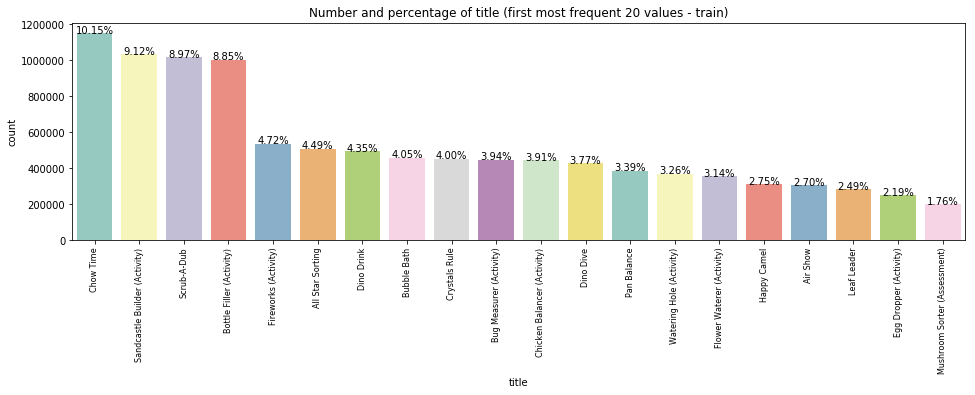

In [0]:
plot_count('title', 'title (first most frequent 20 values - train)', train_df, size=4)

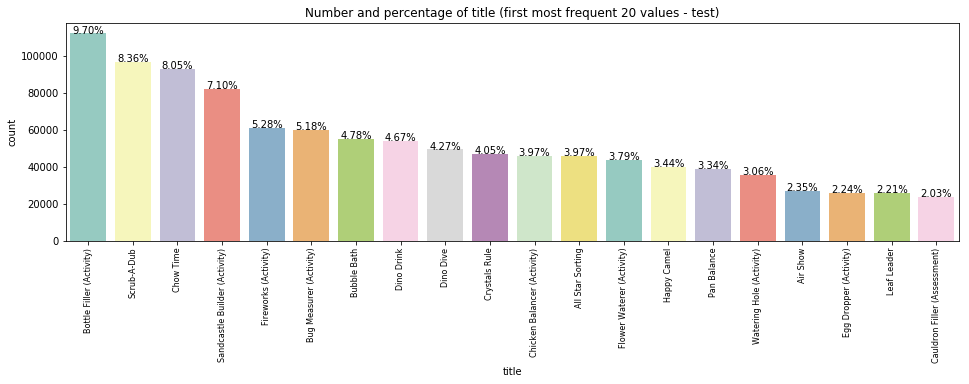

In [0]:
plot_count('title', 'title (first most frequent 20 values - test)', test_df, size=4)

In [0]:
print(f"Title values (train): {train_df.title.nunique()}")
print(f"Title values (test): {test_df.title.nunique()}")

Title values (train): 44
Title values (test): 44


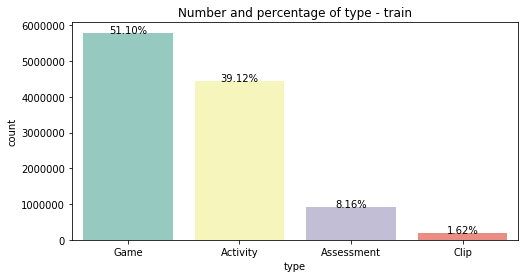

In [0]:
plot_count('type', 'type - train', train_df, size=2)

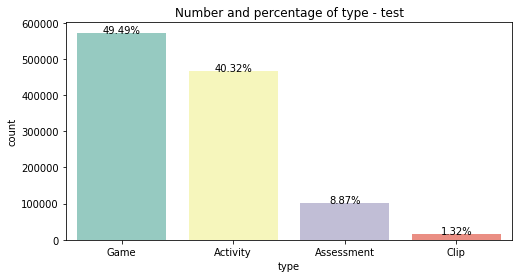

In [0]:
plot_count('type', 'type - test', test_df, size=2)

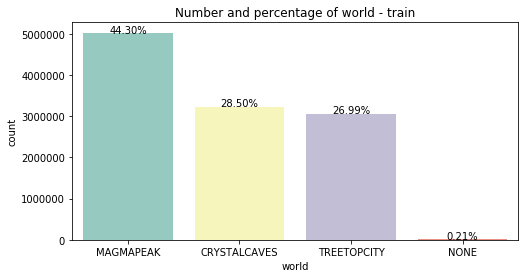

In [0]:
plot_count('world', 'world - train', train_df, size=2)

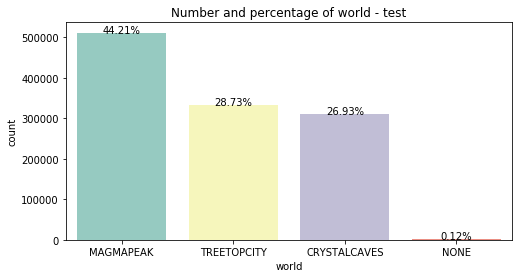

In [0]:
plot_count('world', 'world - test', test_df, size=2)

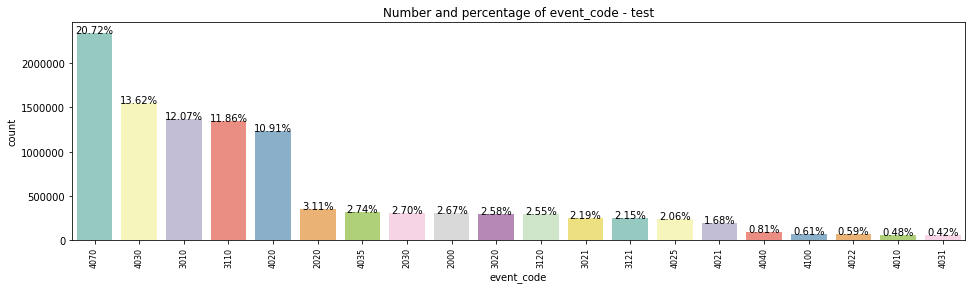

In [0]:
plot_count('event_code', 'event_code - test', train_df, size=4)

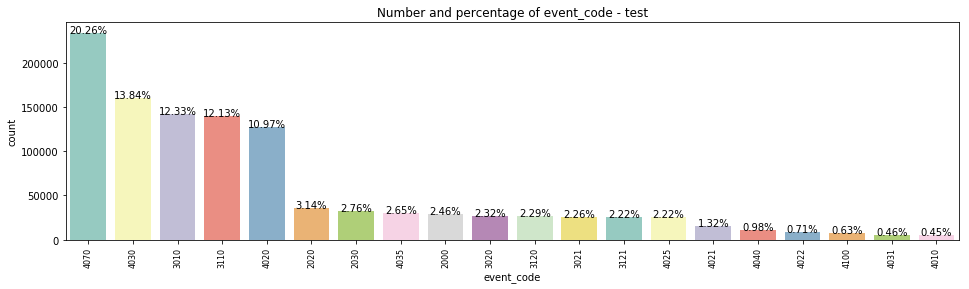

In [0]:
plot_count('event_code', 'event_code - test', test_df, size=4)

### Train_labels

In [0]:
for column in train_labels_df.columns.values:
    print(f"[train_labels] Unique values of {column} : {train_labels_df[column].nunique()}")

[train_labels] Unique values of game_session : 17690
[train_labels] Unique values of installation_id : 3614
[train_labels] Unique values of title : 5
[train_labels] Unique values of num_correct : 2
[train_labels] Unique values of num_incorrect : 46
[train_labels] Unique values of accuracy : 30
[train_labels] Unique values of accuracy_group : 4


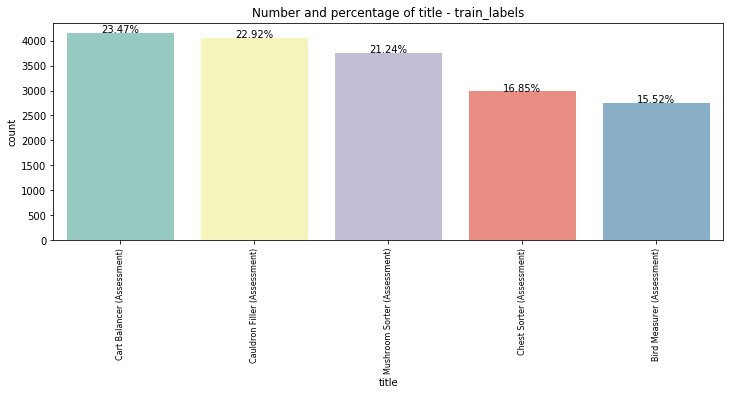

In [0]:
plot_count('title', 'title - train_labels', train_labels_df, size=3)

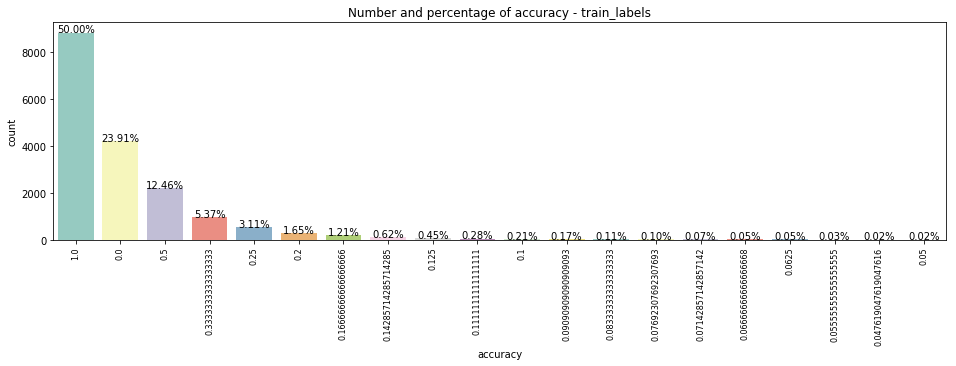

In [0]:
plot_count('accuracy', 'accuracy - train_labels', train_labels_df, size=4)

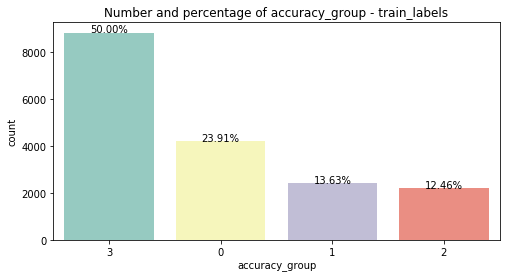

In [0]:
plot_count('accuracy_group', 'accuracy_group - train_labels', train_labels_df, size=2)

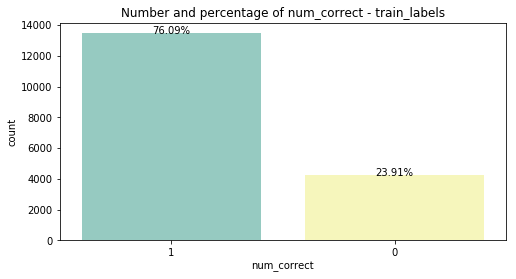

In [0]:
plot_count('num_correct', 'num_correct - train_labels', train_labels_df, size=2)

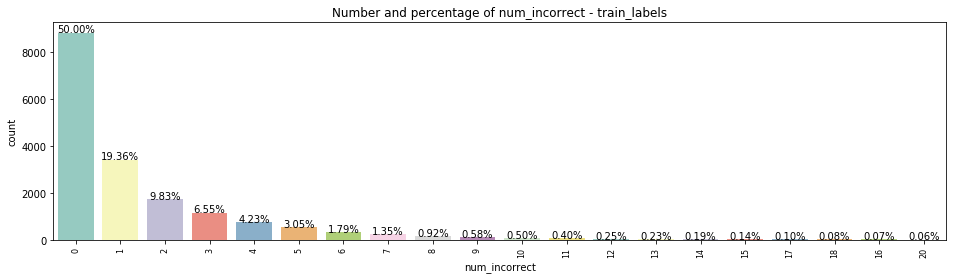

In [0]:
plot_count('num_incorrect', 'num_incorrect - train_labels', train_labels_df, size=4)

### Specs

In [0]:
for column in specs_df.columns.values:
    print(f"[specs] Unique values of `{column}`: {specs_df[column].nunique()}")

[specs] Unique values of `event_id`: 386
[specs] Unique values of `info`: 168
[specs] Unique values of `args`: 191


## <a id="35">Extract features from train/event_data</a>

We will parse a subset of train_df to extract features from event_data. We only extract data from 100K random sampled rows. This should be enough to get a good sample of the content.

In [0]:
sample_train_df = train_df.sample(100000)

In [0]:
sample_train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
7521343,de26c3a6,21205425a391a4d9,2019-09-18T14:15:57.243Z,"{""growth"":[0,0,0,0,0],""flowers"":[8,6,4,3,1],""duration"":50,""event_count"":284,""game_time"":245547,""event_code"":4020}",a7d1a518,284,4020,245547,Flower Waterer (Activity),Activity,TREETOPCITY
8405498,7ec0c298,d870c7dc8d38ea53,2019-07-27T21:21:00.826Z,"{""description"":""To make the sure dinosaur eats the right amount tap and drag the food to the scale, until it's balanced!"",""identifier"":""1434"",""med...",bbb84efa,15,3010,40792,Chow Time,Game,CRYSTALCAVES
2803135,1325467d,b1dbb89a108504d6,2019-08-20T14:54:27.943Z,"{""coordinates"":{""x"":866,""y"":147,""stage_width"":1015,""stage_height"":762},""event_count"":87,""game_time"":76563,""event_code"":4070}",3e65d012,87,4070,76563,Sandcastle Builder (Activity),Activity,MAGMAPEAK
11116058,1c178d24,686abaec668671f9,2019-09-18T22:29:56.736Z,"{""duration"":10221,""misses"":0,""round"":8,""event_count"":105,""game_time"":138029,""event_code"":2030}",fa342fde,105,2030,138029,Pan Balance,Game,CRYSTALCAVES
7524963,e694a35b,9681cec912717f8f,2019-09-13T16:08:28.013Z,"{""rocket"":6,""height"":21,""duration"":800,""coordinates"":{""x"":751,""y"":21,""stage_width"":1015,""stage_height"":762},""launched"":true,""event_count"":4,""game_...",a7ee4204,4,4020,2869,Fireworks (Activity),Activity,TREETOPCITY


Let's look to some of the `event_data` in this sample.

In [0]:
sample_train_df.iloc[0].event_data

'{"growth":[0,0,0,0,0],"flowers":[8,6,4,3,1],"duration":50,"event_count":284,"game_time":245547,"event_code":4020}'

In [0]:
sample_train_df.iloc[1].event_data

'{"description":"To make the sure dinosaur eats the right amount tap and drag the food to the scale, until it\'s balanced!","identifier":"1434","media_type":"animation","total_duration":6708,"round":2,"event_count":15,"game_time":40792,"event_code":3010}'

We use **json** package to normalize the json; we will create one column for each key; the value in the column will be the value associated to the key in the json. The extracted data columns will be quite sparse.

In [0]:
%%time
extracted_event_data = pd.io.json.json_normalize(sample_train_df.event_data.apply(json.loads))

CPU times: user 11.8 s, sys: 300 ms, total: 12.1 s
Wall time: 12.1 s


In [0]:
print(f"Extracted data shape: {extracted_event_data.shape}")

Extracted data shape: (100000, 136)


In [0]:
extracted_event_data.head(10)

,growth,flowers,duration,event_count,game_time,event_code,description,identifier,media_type,total_duration,...,end_position,tutorial_step,hats_placed,time_played,total_bowls,bowls,molds,tape_length,bug_length,chests
0,"[0, 0, 0, 0, 0]","[8, 6, 4, 3, 1]",50.0,284,245547.0,4020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,15,40792.0,3010,"To make the sure dinosaur eats the right amount tap and drag the food to the scale, until it's balanced!",1434,animation,6708.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,87,76563.0,4070,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10221.0,105,138029.0,2030,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,800.0,4,2869.0,4020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,40,10348.0,4070,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1900.0,29,21269.0,3110,Whoa that one was so high!,Dot_SoHigh,audio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,155,132161.0,4020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,521.0,52,38494.0,4025,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,43,56073.0,2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check the statistics of the missing values in these columns.

In [0]:
missing_data(extracted_event_data)

,growth,flowers,duration,event_count,game_time,event_code,description,identifier,media_type,total_duration,...,end_position,tutorial_step,hats_placed,time_played,total_bowls,bowls,molds,tape_length,bug_length,chests
Total,99616,98431,66989,0,1679,0,66071,66656,66656,83061,...,99975,99931,99922,99945,99901,99901,99987,99996,99996,99998
Percent,99.616,98.431,66.989,0,1.679,0,66.071,66.656,66.656,83.061,...,99.975,99.931,99.922,99.945,99.901,99.901,99.987,99.996,99.996,99.998
Types,object,object,float64,int64,float64,int64,object,object,object,float64,...,float64,float64,object,float64,float64,object,object,float64,float64,object


We modify the `missing_data` function to order the most frequent encountered event data features (newly created function `existing_data`).

In [0]:
def existing_data(data):
    total = data.isnull().count() - data.isnull().sum()
    percent = 100 - (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    tt = pd.DataFrame(tt.reset_index())
    return(tt.sort_values(['Total'], ascending=False))

In [0]:
stat_event_data = existing_data(extracted_event_data)

Let's look to the first 40 values, ordered by percent of existing data (descending).

Text(0, 0.5, 'Features')

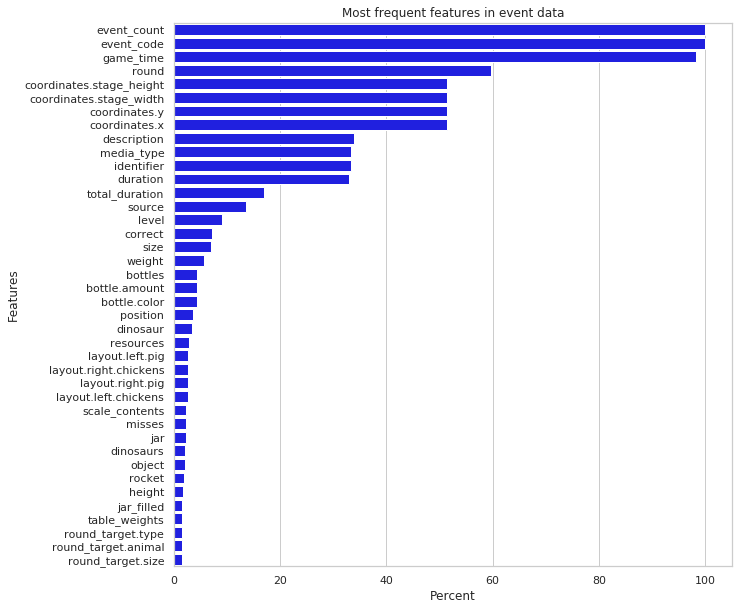

In [0]:
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
ax = sns.barplot(x='Percent', y='index', data=stat_event_data.head(40), color='blue')
plt.title('Most frequent features in event data')
plt.ylabel('Features')

In [0]:
stat_event_data[['index', 'Percent']].head(20)

,index,Percent
3,event_count,100.000
5,event_code,100.000
4,game_time,98.321
10,round,59.674
14,coordinates.stage_height,51.441
13,coordinates.stage_width,51.441
12,coordinates.y,51.441
11,coordinates.x,51.441
6,description,33.929
8,media_type,33.344


## <a id="36">Extract features from specs/args</a>  

Let's try to extract data from `args` column in `specs_df` similarly we did for `event_data`.

In [0]:
specs_df.args[0]

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

Each row contains a list of key-values pairs (a dictionary), with the keys: `name`, `type` & `info`.
We will parse this structure and generate new rows for each spec.

In [0]:
specs_args_extracted = pd.DataFrame()
for i in range(0, specs_df.shape[0]): 
    for arg_item in json.loads(specs_df.args[i]) :
        new_df = pd.DataFrame({'event_id': specs_df['event_id'][i],\
                               'info':specs_df['info'][i],\
                               'args_name': arg_item['name'],\
                               'args_type': arg_item['type'],\
                               'args_info': arg_item['info']}, index=[i])
        specs_args_extracted = specs_args_extracted.append(new_df)

In [0]:
print(f"Extracted args from specs: {specs_args_extracted.shape}")

Extracted args from specs: (2541, 5)


There is a variable number of arguments for each `event_id`.

In [0]:
specs_args_extracted.head(5)

,event_id,info,args_name,args_type,args_info
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,game_time,int,millisecond count since start of game
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,round,int,number of the current round when the event takes place or 0 if no round
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,level,int,number of the current level when the event takes place or 0 if no level
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,description,string,the text or description of the instruction
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,identifier,string,a unique identifier for this piece of instruction


Let's see the distribution of the number of arguments for each `event_id`.

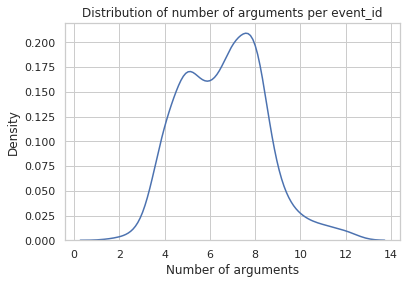

In [0]:
tmp = specs_args_extracted.groupby(['event_id'])['info'].count()
df = pd.DataFrame({'event_id':tmp.index, 'count': tmp.values})
plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
ax = sns.distplot(df['count'],kde=True,hist=False, bins=40)
plt.title('Distribution of number of arguments per event_id')
plt.xlabel('Number of arguments'); plt.ylabel('Density'); plt.show()

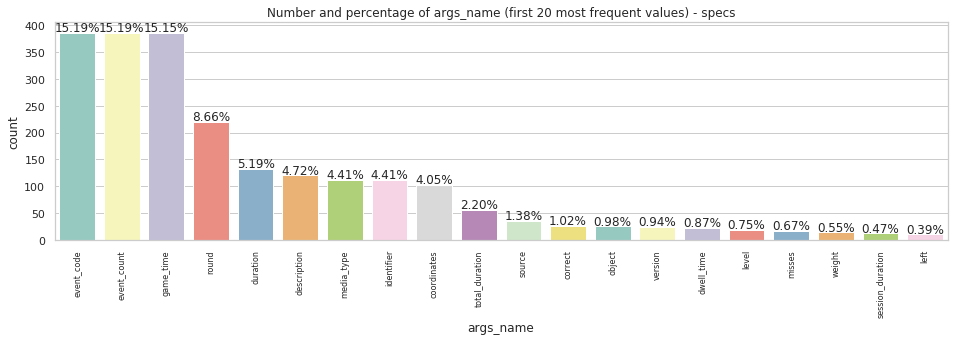

In [0]:
plot_count('args_name', 'args_name (first 20 most frequent values) - specs', specs_args_extracted, size=4)

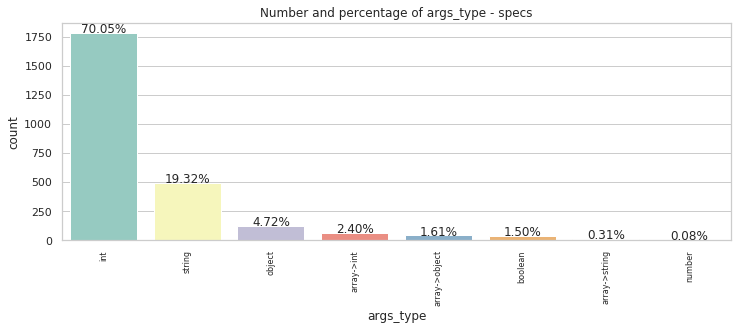

In [0]:
plot_count('args_type', 'args_type - specs', specs_args_extracted, size=3)

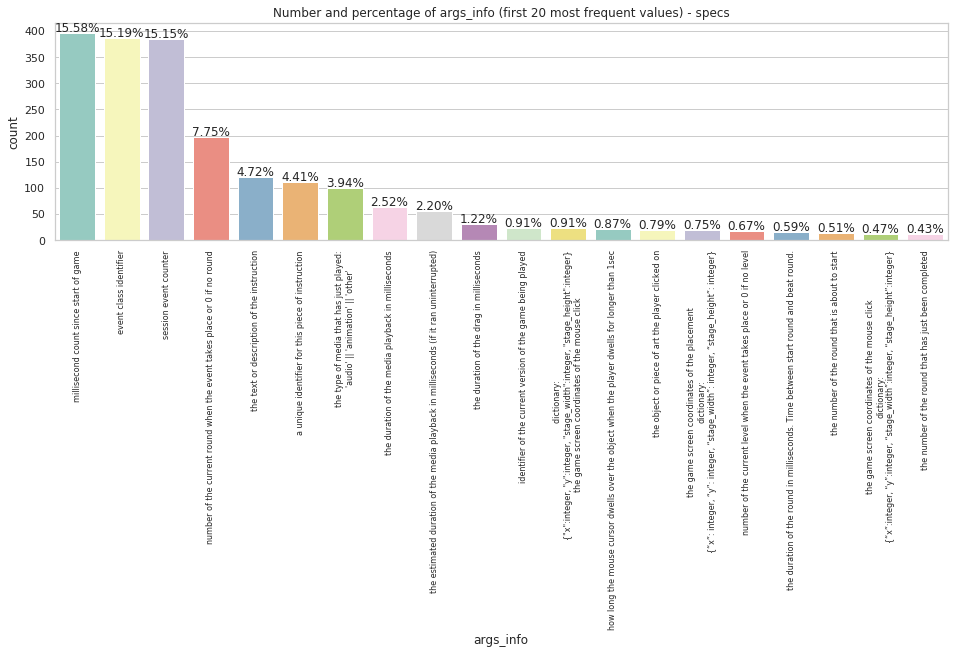

In [0]:
plot_count('args_info', 'args_info (first 20 most frequent values) - specs', specs_args_extracted, size=4)

## <a id="37">Merged data distribution</a>  

Let's merge train and train_labels.

### Extract time features

We define a function to extract time features. We will apply this function for both train and test datasets.

In [0]:
def extract_time_features(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['month'] = df['timestamp'].dt.month
    df['hour'] = df['timestamp'].dt.hour
    df['year'] = df['timestamp'].dt.year
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['weekofyear'] = df['timestamp'].dt.weekofyear
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    df['quarter'] = df['timestamp'].dt.quarter
    df['is_month_start'] = df['timestamp'].dt.is_month_start
    return df

We apply the function to extract time features.

In [0]:
train_df = extract_time_features(train_df)

In [0]:
test_df = extract_time_features(test_df)

In [0]:
train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,9,17,2019,4,36,249,3,False
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""id...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""id...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False


In [0]:
test_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start
0,27253bdc,0ea9ecc81a565215,2019-09-10 16:50:24.910000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-10,9,16,2019,1,37,253,3,False
1,27253bdc,c1ea43d8b8261d27,2019-09-10 16:50:55.503000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-10,9,16,2019,1,37,253,3,False
2,27253bdc,7ed86c6b72e725e2,2019-09-10 16:51:51.805000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK,2019-09-10,9,16,2019,1,37,253,3,False
3,27253bdc,7e516ace50e7fe67,2019-09-10 16:53:12.825000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES,2019-09-10,9,16,2019,1,37,253,3,False
4,7d093bf9,a022c3f60ba547e7,2019-09-10 16:54:12.115000+00:00,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES,2019-09-10,9,16,2019,1,37,253,3,False


We inspect now the date/time type data.

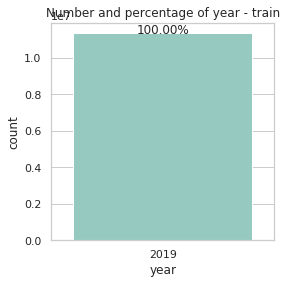

In [0]:
plot_count('year', 'year - train', train_df, size=1)

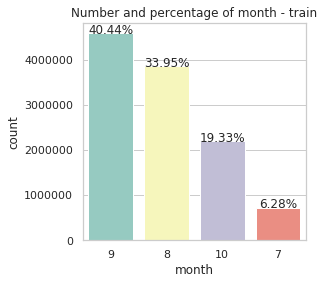

In [0]:
plot_count('month', 'month - train', train_df, size=1)

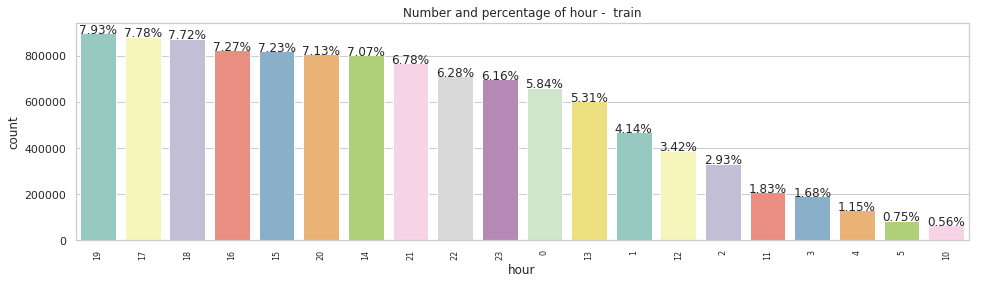

In [0]:
plot_count('hour', 'hour -  train', train_df, size=4)

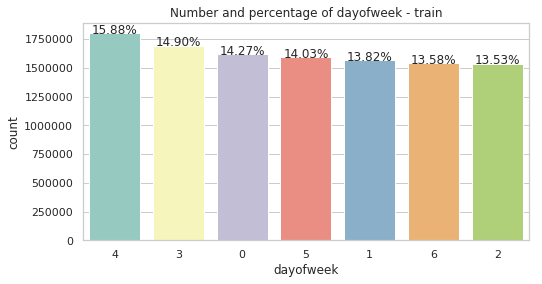

In [0]:
plot_count('dayofweek', 'dayofweek - train', train_df, size=2)

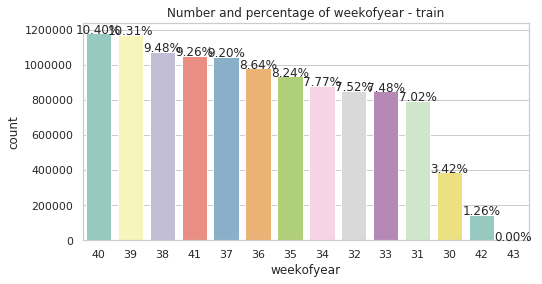

In [0]:
plot_count('weekofyear', 'weekofyear - train', train_df, size=2)

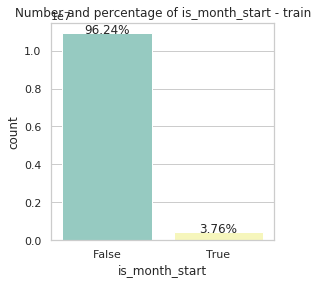

In [0]:
plot_count('is_month_start', 'is_month_start - train', train_df, size=1)

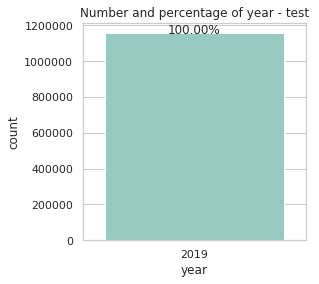

In [0]:
plot_count('year', 'year - test', test_df, size=1)

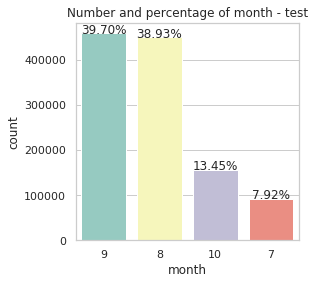

In [0]:
plot_count('month', 'month - test', test_df, size=1)

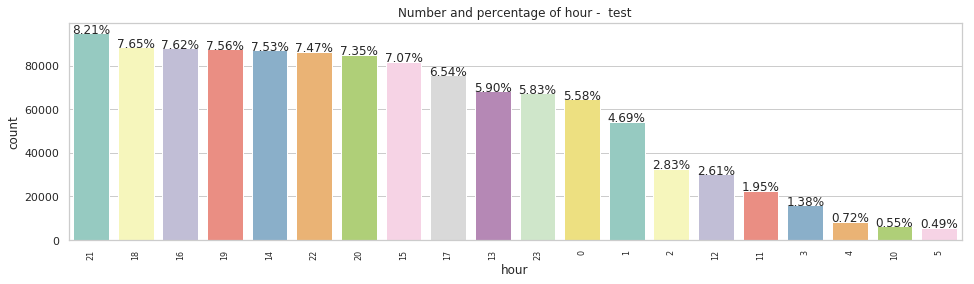

In [0]:
plot_count('hour', 'hour -  test', test_df, size=4)

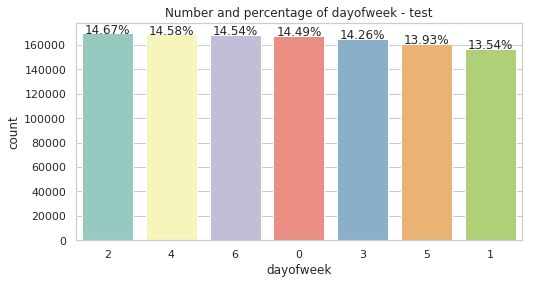

In [0]:
plot_count('dayofweek', 'dayofweek - test', test_df, size=2)

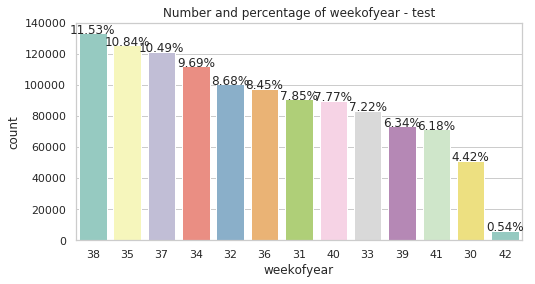

In [0]:
plot_count('weekofyear', 'weekofyear - test', test_df, size=2)

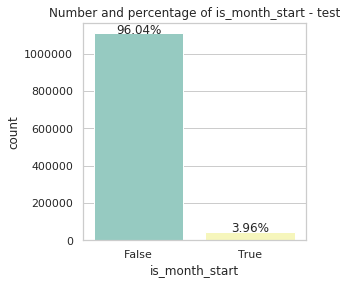

In [0]:
plot_count('is_month_start', 'is_month_start - test', test_df, size=1)

Here we define the numerical columns and the categorical columns. We will use these to calculate the aggregated functions for the merge.

In [0]:
numerical_columns = ['game_time', 'month', 'dayofweek', 'hour']
categorical_columns = ['type', 'world']

comp_train_df = pd.DataFrame({'installation_id': train_df['installation_id'].unique()})
comp_train_df.set_index('installation_id', inplace = True)

In [0]:
def get_numeric_columns(df, column):
    df = df.groupby('installation_id').agg({f'{column}': ['mean', 'sum', 'min', 'max', 'std', 'skew']})
    df[column].fillna(df[column].mean(), inplace = True)
    df.columns = [f'{column}_mean', f'{column}_sum', f'{column}_min', f'{column}_max', f'{column}_std', f'{column}_skew']
    return df

Then, we calculate the compacted form of train, by merging the aggregated numerical features from train with the dataset with unique `installation_id`.

In [0]:
for i in numerical_columns:
    comp_train_df = comp_train_df.merge(get_numeric_columns(train_df, i), left_index = True, right_index = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
print(f"comp_train shape: {comp_train_df.shape}")

comp_train shape: (17000, 24)


In [0]:
comp_train_df.head()

,game_time_mean,game_time_sum,game_time_min,game_time_max,game_time_std,game_time_skew,month_mean,month_sum,month_min,month_max,...,dayofweek_min,dayofweek_max,dayofweek_std,dayofweek_skew,hour_mean,hour_sum,hour_min,hour_max,hour_std,hour_skew
installation_id,,,,,,,,,,,,,,,,,,,,,
0001e90f,201787.799558,273826044,0,570396,164377.067566,0.664036,9.000000,12213,9,9,...,4,4,0.000000,0.000000,17.733235,24064,17,18,0.442432,-1.055889
000447c4,81011.751381,14663127,0,175347,47014.118535,0.101741,10.000000,1810,10,10,...,4,4,0.000000,0.000000,14.690608,2659,14,15,0.463525,-0.831616
0006a69f,82491.007366,313548319,0,1520600,159789.192183,7.504204,8.000000,30408,8,8,...,1,4,1.118187,1.140557,11.927124,45335,4,20,6.595070,-0.051903
0006c192,90398.352968,201045937,0,395901,77779.338412,1.366377,9.238309,20546,9,10,...,1,5,1.656208,-1.090668,9.882644,21979,0,15,6.944234,-0.674168
0009a5a9,398593.543689,164220540,0,1684228,648848.534146,1.312675,9.000000,3708,9,9,...,2,2,0.000000,0.000000,18.225728,7509,18,19,0.418569,1.316914


In [0]:
# get the mode of the title
labels_map = dict(train_labels_df.groupby('title')['accuracy_group'].agg(lambda x:x.value_counts().index[0]))
# merge target
labels = train_labels_df[['installation_id', 'title', 'accuracy_group']]
# replace title with the mode
labels['title'] = labels['title'].map(labels_map)
# join train with labels
comp_train_df = labels.merge(comp_train_df, on = 'installation_id', how = 'left')
print('We have {} training rows'.format(comp_train_df.shape[0]))

We have 17690 training rows


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
comp_train_df.head()

,installation_id,title,accuracy_group,game_time_mean,game_time_sum,game_time_min,game_time_max,game_time_std,game_time_skew,month_mean,...,dayofweek_min,dayofweek_max,dayofweek_std,dayofweek_skew,hour_mean,hour_sum,hour_min,hour_max,hour_std,hour_skew
0,0006a69f,3,3,82491.007366,313548319,0,1520600,159789.192183,7.504204,8.0,...,1,4,1.118187,1.140557,11.927124,45335,4,20,6.59507,-0.051903
1,0006a69f,0,0,82491.007366,313548319,0,1520600,159789.192183,7.504204,8.0,...,1,4,1.118187,1.140557,11.927124,45335,4,20,6.59507,-0.051903
2,0006a69f,3,3,82491.007366,313548319,0,1520600,159789.192183,7.504204,8.0,...,1,4,1.118187,1.140557,11.927124,45335,4,20,6.59507,-0.051903
3,0006a69f,3,2,82491.007366,313548319,0,1520600,159789.192183,7.504204,8.0,...,1,4,1.118187,1.140557,11.927124,45335,4,20,6.59507,-0.051903
4,0006a69f,0,3,82491.007366,313548319,0,1520600,159789.192183,7.504204,8.0,...,1,4,1.118187,1.140557,11.927124,45335,4,20,6.59507,-0.051903


In [0]:
print(f"comp_train_df shape: {comp_train_df.shape}")
for feature in comp_train_df.columns.values[3:20]:
    print(f"{feature} unique values: {comp_train_df[feature].nunique()}")

comp_train_df shape: (17690, 27)
game_time_mean unique values: 3614
game_time_sum unique values: 3614
game_time_min unique values: 1
game_time_max unique values: 3608
game_time_std unique values: 3614
game_time_skew unique values: 3614
month_mean unique values: 1716
month_sum unique values: 3213
month_min unique values: 4
month_max unique values: 4
month_std unique values: 1718
month_skew unique values: 1715
dayofweek_mean unique values: 2564
dayofweek_sum unique values: 2975
dayofweek_min unique values: 7
dayofweek_max unique values: 7
dayofweek_std unique values: 2561


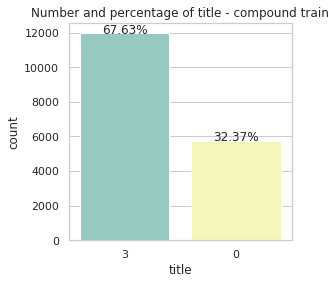

In [0]:
plot_count('title', 'title - compound train', comp_train_df)

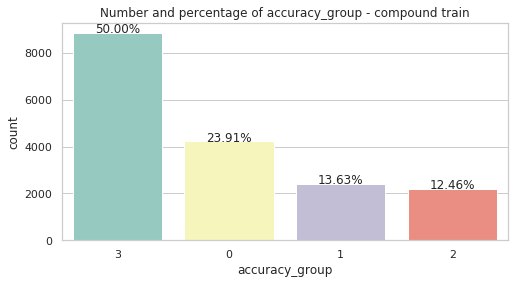

In [0]:
plot_count('accuracy_group', 'accuracy_group - compound train', comp_train_df, size=2)

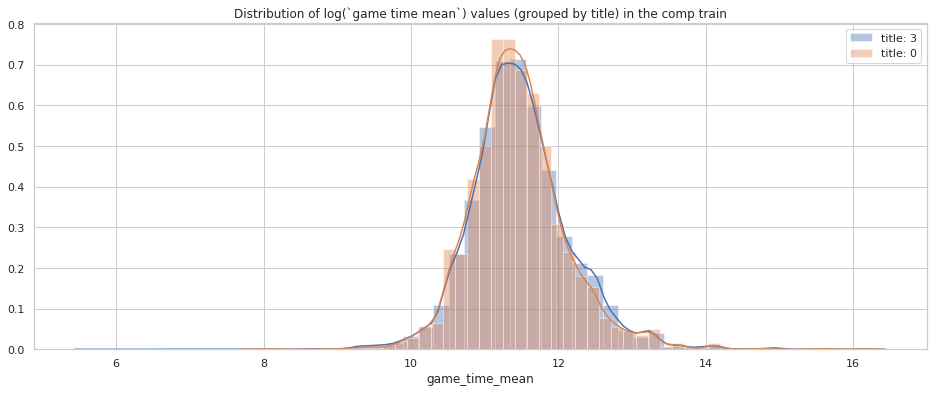

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of log(`game time mean`) values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(np.log(red_comp_train_df['game_time_mean']), kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

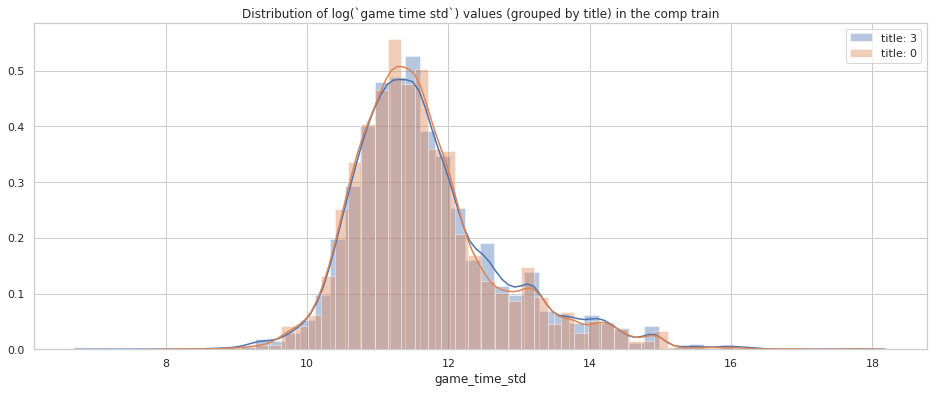

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of log(`game time std`) values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(np.log(red_comp_train_df['game_time_std']), kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

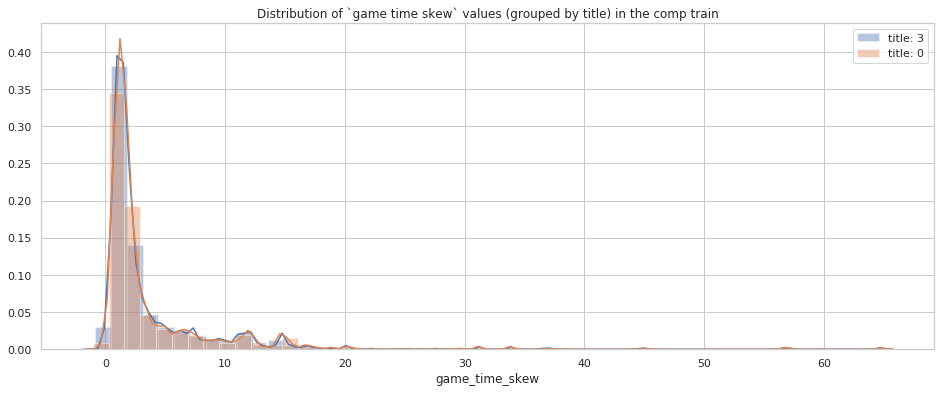

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `game time skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['game_time_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

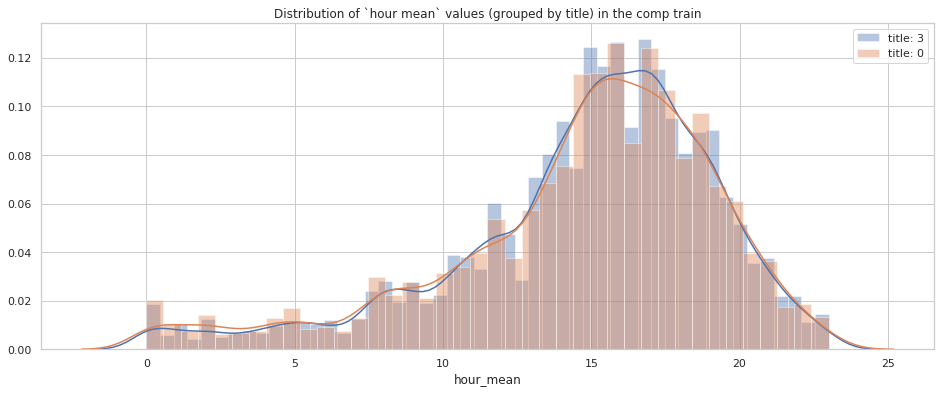

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour mean` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_mean'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

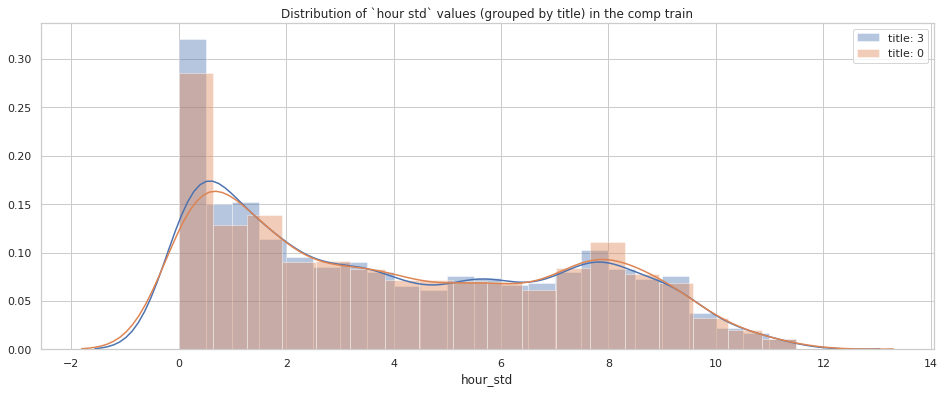

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour std` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_std'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

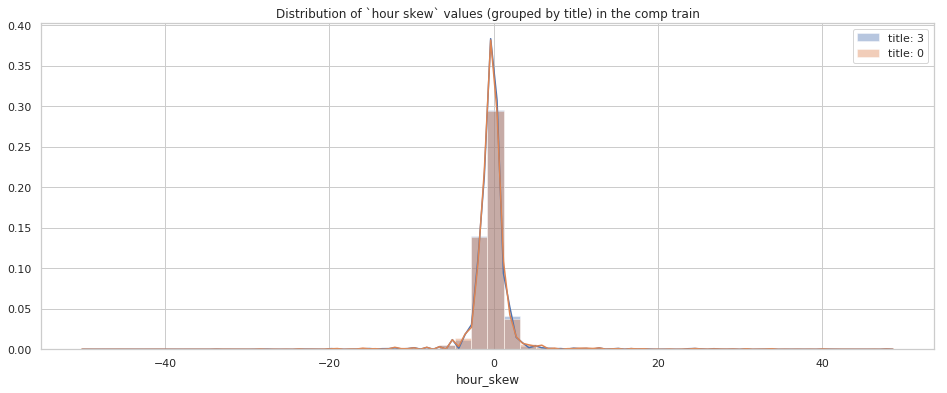

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

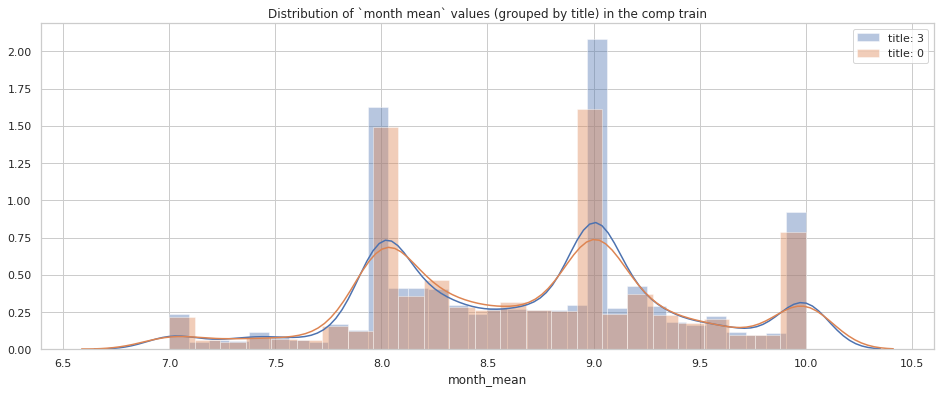

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month mean` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_mean'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

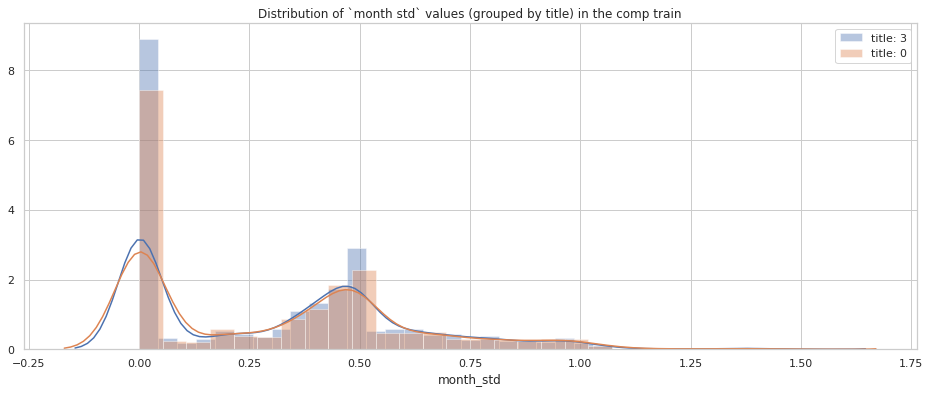

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month std` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_std'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

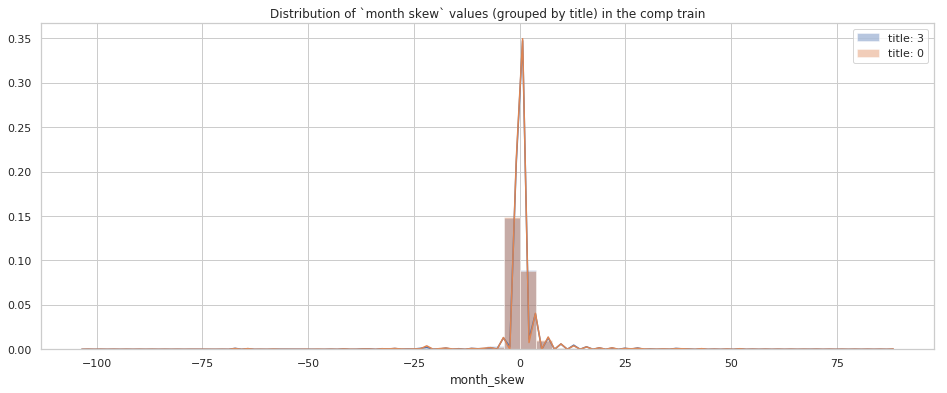

In [0]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

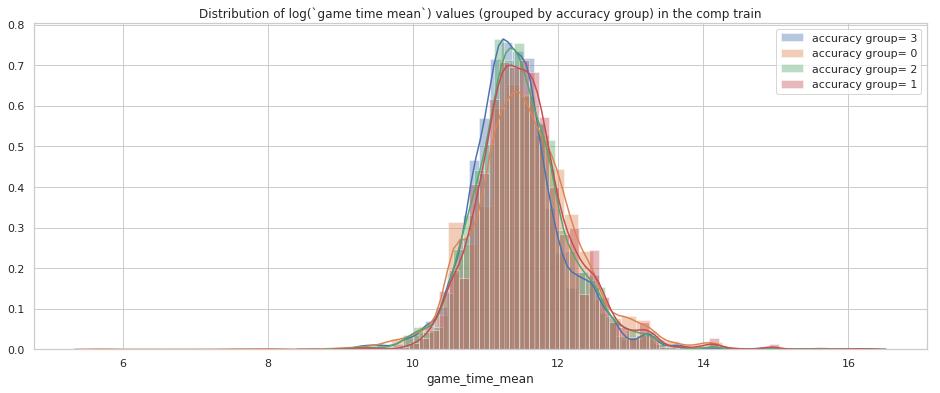

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of log(`game time mean`) values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(np.log(red_comp_train_df['game_time_mean']), kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

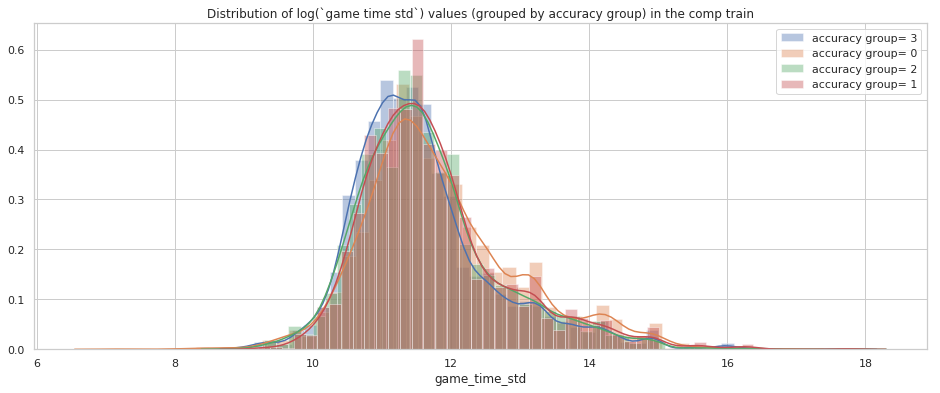

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of log(`game time std`) values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(np.log(red_comp_train_df['game_time_std']), kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

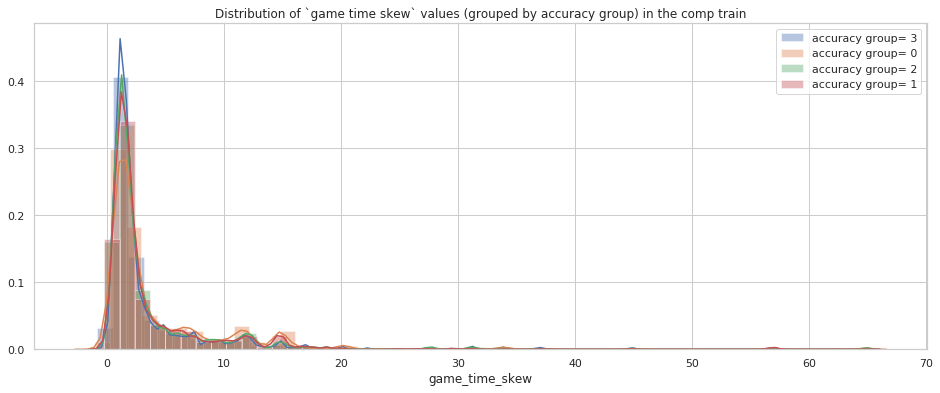

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `game time skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['game_time_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

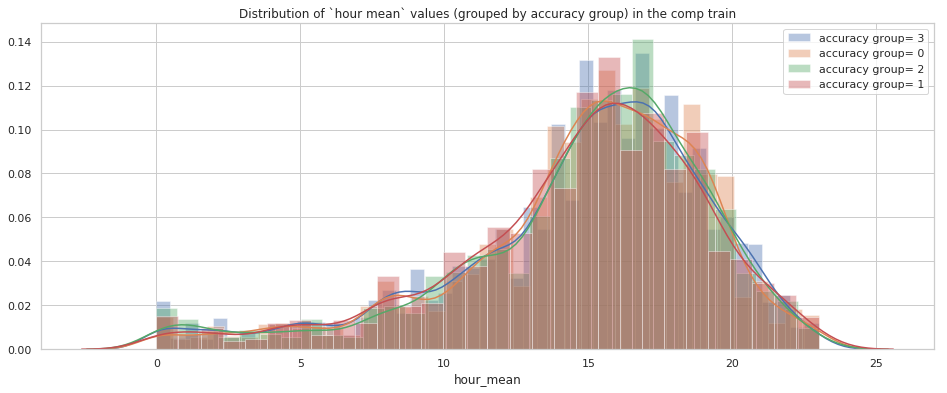

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour mean` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_mean'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

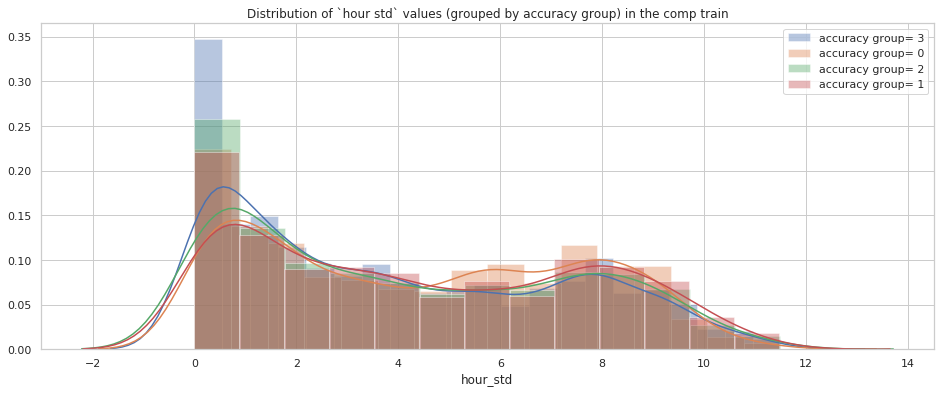

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour std` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_std'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

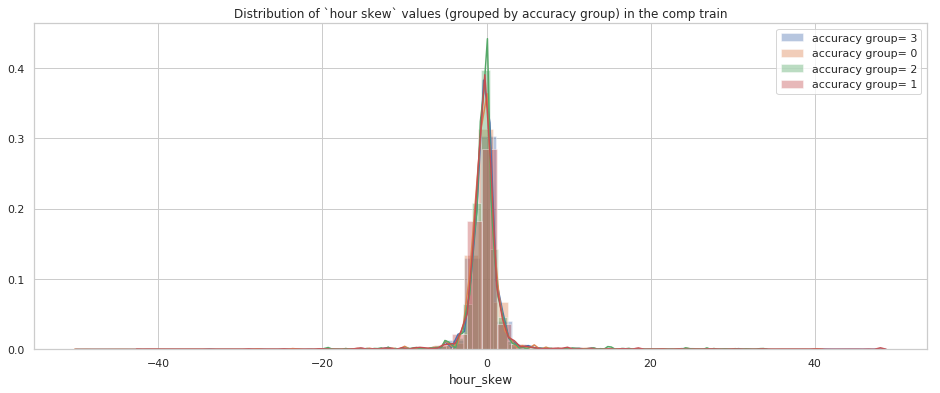

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

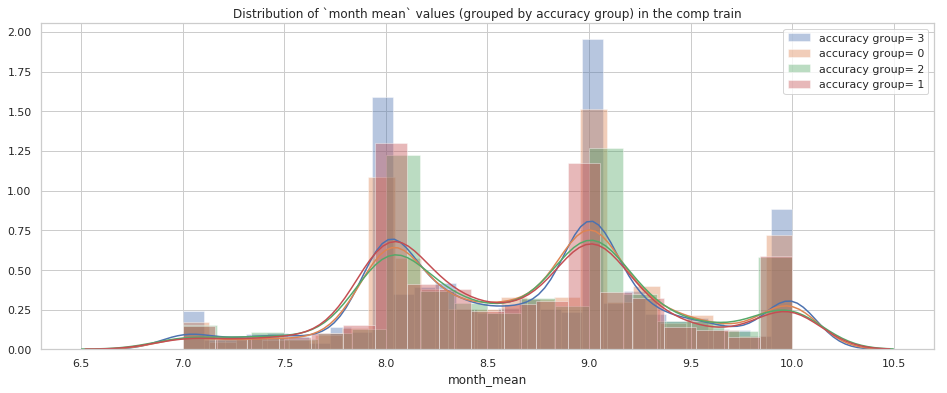

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month mean` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_mean'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

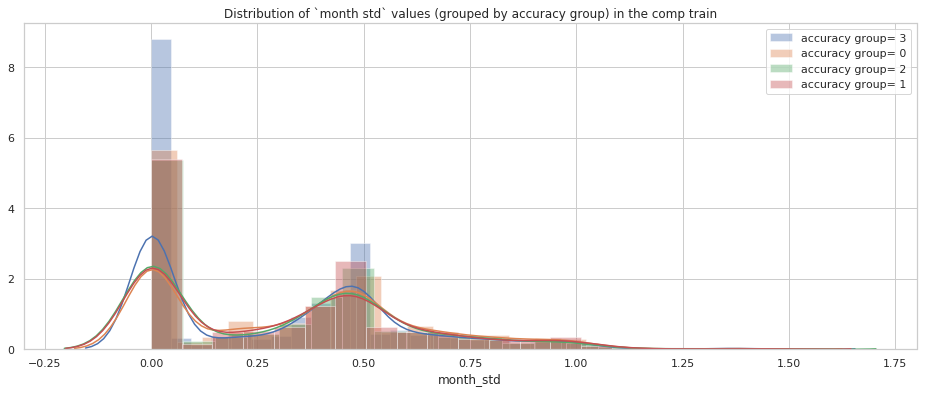

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month std` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_std'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

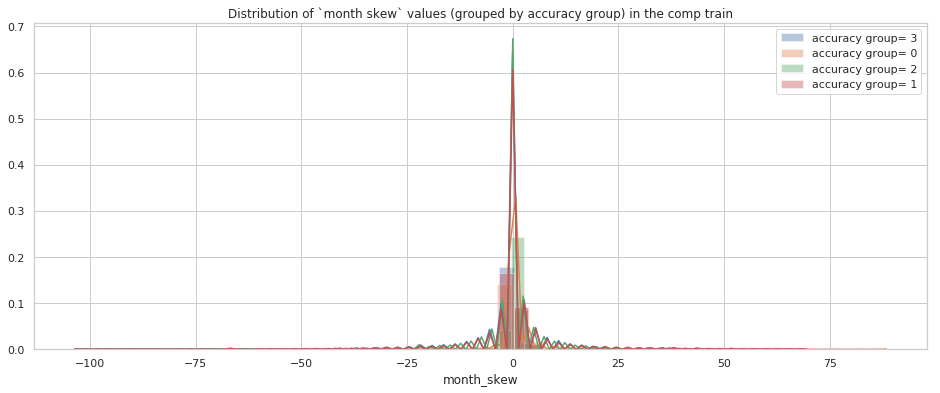

In [0]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

# <a id="4">Next step</a>  

The next step will be to use the ideas from data exploration to start extracting, selecting, engineering features and prepare models.  

